# DSC 530 - Shooting in the NBA

Python code to drive the exploratory data analysis outlined in the accompanying PowerPoint.

https://github.com/xshyti/ThinkStats2

Xhoi Shyti

========================================================================================================

Below is the main loop that iterates from 1946 to 2023. These represent annual NBA seasons, and for each season I create season_id which is passed into the endpoint from which I get the response for. I then parse the response for the result set and headers, and for each game in the result set I write as a row in the CSV. This is the script that grabs the data from stats.nba.com, and the result are several files, one for each annual season.

In [1]:
import requests
import json
import csv
 
for i in range(1946, 2023):
    season_id = '{}-{}'.format(str(i), str(i+1)[-2:])

    url = 'https://stats.nba.com/stats/leaguegamelog?Counter=1000&DateFrom=&DateTo=&Direction=DESC&LeagueID=00&PlayerOrTeam=T&Season='+season_id+'&SeasonType=Regular%20Season&Sorter=DATE'
    headers  = {
        'Connection': 'keep-alive',
        'Accept': 'application/json, text/plain, */*',
        'x-nba-stats-token': 'true',
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
        'x-nba-stats-origin': 'stats',
        'Sec-Fetch-Site': 'same-origin',
        'Sec-Fetch-Mode': 'cors',
        'Referer': 'https://stats.nba.com/',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'en-US,en;q=0.9',
    }

    response = requests.get(url=url, headers=headers).json()
    games = response['resultSets'][0]['rowSet']
     
    header = response['resultSets'][0]['headers']
    data_file_name = '{}.csv'.format(season_id)
    data_file = open(data_file_name, 'w')
     
    csv_writer = csv.writer(data_file)
     
    count = 0
     
    for game in games:
        if count == 0:
     
            header = header
            csv_writer.writerow(header)
            count += 1
     
        csv_writer.writerow(game)
     
    data_file.close()

After collecting the data, we need to process it further to consolidate it all into a single csv. This makes our data analysis much easier. The below script does just that, and the result is a single csv with all of the collected data.

In [2]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

csv_folder = '/Users/xhoishyti/School/Data_Exploration_and_Analysis_DSC530/week12'

combined_data = pd.DataFrame()

for filename in os.listdir(csv_folder):
    if filename.endswith('.csv'):
        filepath = os.path.join(csv_folder, filename)
        df = pd.read_csv(filepath)
        combined_data = combined_data.append(df, ignore_index=True)

output_file = '/Users/xhoishyti/School/Data_Exploration_and_Analysis_DSC530/week12/nba_games/all_games.csv'
combined_data.to_csv(output_file, index=False)

Now that we have all of the data in one place, we need to clean it, and remove any row/observation that is missing a required variable. Required variables are mentioned in the PowerPoint presentation. In addition to that, we need to update the WL column such that it contains binary values. This will enable us to do regression analysis later on.

In [3]:
required_columns = ['WL', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'GAME_DATE']
combined_data_cleaned = combined_data.dropna(subset=required_columns)
combined_data_cleaned['WL'] = combined_data_cleaned['WL'].replace({'L': 0, 'W': 1})

/var/folders/2t/c725sqvj3cq18rcst7q7c0lr0000gn/T/ipykernel_20493/2299597941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_cleaned['WL'] = combined_data_cleaned['WL'].replace({'L': 0, 'W': 1})


In [4]:
import matplotlib.pyplot as plt

def analyzeVariable (column):
    plt.hist(combined_data_cleaned['{}'.format(column)], bins=20, edgecolor='black')
    plt.title('Histogram {}'.format(column))
    plt.xlabel('{}'.format(column))
    plt.ylabel('Frequency')
    plt.show()

    mean = combined_data_cleaned['{}'.format(column)].mean()
    mode = combined_data_cleaned['{}'.format(column)].mode()
    _range = combined_data_cleaned['{}'.format(column)].var()
    minTail = combined_data_cleaned['{}'.format(column)].quantile(0.05)
    maxTail = combined_data_cleaned['{}'.format(column)].quantile(0.95)

    print("Mean: {}".format(mean))
    print("Mode: {}".format(mode))
    print("Spread: {}".format(_range))
    print("Lower Tail: {}".format(minTail))
    print("Upper Tail: {}".format(maxTail))

### Analysis of Required Variables

The following section contains histograms and other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails  of the required variables.

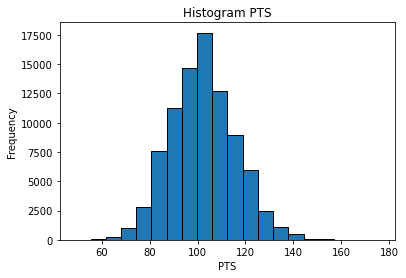

Mean: 102.22311840293713
Mode: 0    99
Name: PTS, dtype: int64
Spread: 182.27905341293496
Lower Tail: 81.0
Upper Tail: 125.0


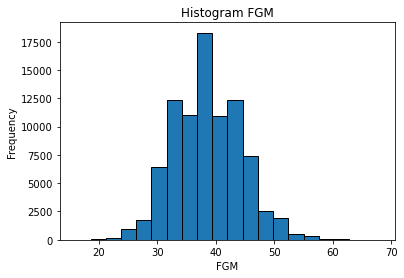

Mean: 38.46868976594768
Mode: 0    37.0
Name: FGM, dtype: float64
Spread: 32.9383833496366
Lower Tail: 29.0
Upper Tail: 48.0


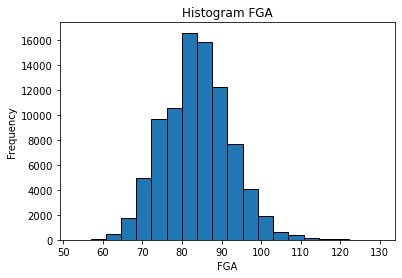

Mean: 83.69617944011014
Mode: 0    83.0
Name: FGA, dtype: float64
Spread: 70.81574510668094
Lower Tail: 70.0
Upper Tail: 98.0


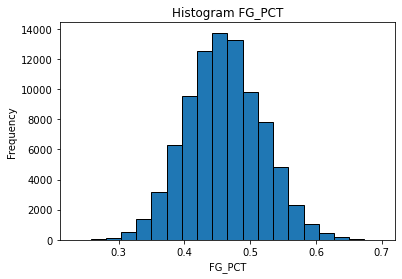

Mean: 0.4604413836622387
Mode: 0    0.5
Name: FG_PCT, dtype: float64
Spread: 0.0033187446910715743
Lower Tail: 0.368
Upper Tail: 0.557


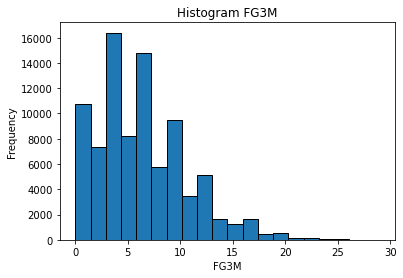

Mean: 6.280048187241854
Mode: 0    4.0
Name: FG3M, dtype: float64
Spread: 18.611173875297226
Lower Tail: 0.0
Upper Tail: 14.0


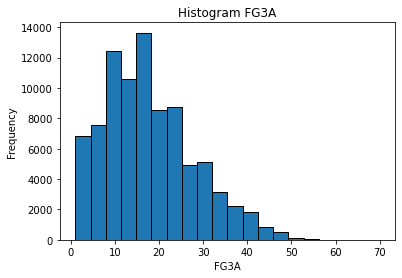

Mean: 17.73290500229463
Mode: 0    13.0
Name: FG3A, dtype: float64
Spread: 105.54556647566427
Lower Tail: 3.0
Upper Tail: 37.0


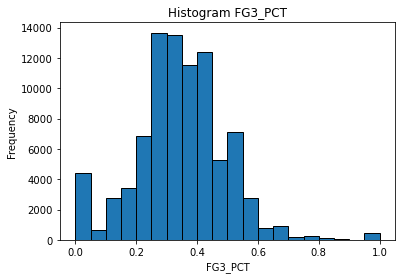

Mean: 0.3422699403395981
Mode: 0    0.333
Name: FG3_PCT, dtype: float64
Spread: 0.022367632772792453
Lower Tail: 0.0
Upper Tail: 0.571


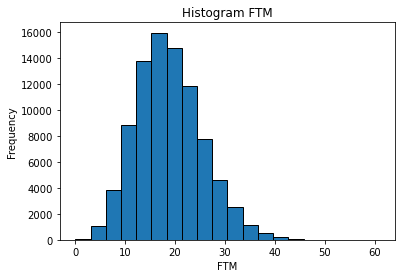

Mean: 19.00569068379991
Mode: 0    17.0
Name: FTM, dtype: float64
Spread: 42.92388826650452
Lower Tail: 9.0
Upper Tail: 31.0


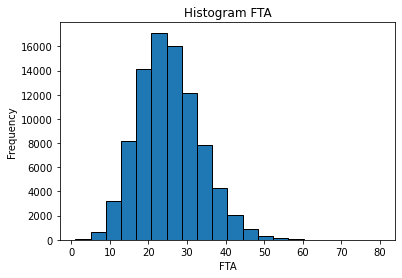

Mean: 25.125355667737495
Mode: 0    24.0
Name: FTA, dtype: float64
Spread: 65.61060090151459
Lower Tail: 13.0
Upper Tail: 39.0


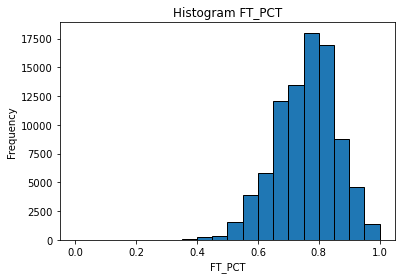

Mean: 0.7568952615879126
Mode: 0    0.75
Name: FT_PCT, dtype: float64
Spread: 0.00996337017224735
Lower Tail: 0.583
Upper Tail: 0.909


In [5]:
subset=['PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT']

for variable in subset:
    analyzeVariable(variable)

### Analysis of Three-Pointer Attempts using PMFs
For this comparison, I will be considering two time frames. The first time frame is 1980-1999, and the second time frame is 2000-2023. The point is to see how the probabilities of 3 point attempts differ back then vs now. The approach is to create two new data frames, one that only has games from 1980-1999, and the other which only has games from 2000-2023. Then I will create a PMF for the FG3A (three-point attempts) variable for each era, plot them, and compare.

In [6]:
from datetime import datetime
pd.options.mode.chained_assignment = None

In [7]:
# prepare GAME_DATE column to be able to do comparisons
combined_data_cleaned['GAME_DATE'] = pd.to_datetime(combined_data_cleaned['GAME_DATE'])

combined_data_cleaned_1980_1999 = combined_data_cleaned[(combined_data_cleaned['GAME_DATE'].dt.year >= 1980) & (combined_data_cleaned['GAME_DATE'].dt.year <= 1999)]
combined_data_cleaned_2000_2023 = combined_data_cleaned[(combined_data_cleaned['GAME_DATE'].dt.year >= 2000) & (combined_data_cleaned['GAME_DATE'].dt.year <= 2023)]

Now that we have our new data frames ready, we can process the PMF of FG3A and map it to a new column called FG3A_PMF. I will do this for both of the new data frames.

In [8]:
# 1980 - 1999
fg3a_pmf_1980_1999 = combined_data_cleaned_1980_1999['FG3A'].value_counts(normalize=True)
combined_data_cleaned_1980_1999['FG3A_PMF'] = combined_data_cleaned_1980_1999['FG3A'].map(fg3a_pmf_1980_1999)

# 2000 - 2023
fg3a_pmf_2000_2023 = combined_data_cleaned_2000_2023['FG3A'].value_counts(normalize=True)
combined_data_cleaned_2000_2023['FG3A_PMF'] = combined_data_cleaned_2000_2023['FG3A'].map(fg3a_pmf_2000_2023)

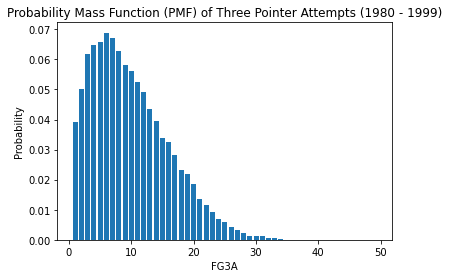

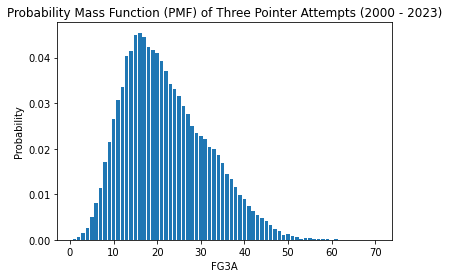

In [9]:
plt.bar(fg3a_pmf_1980_1999.index, fg3a_pmf_1980_1999)
plt.title('Probability Mass Function (PMF) of Three Pointer Attempts (1980 - 1999)')
plt.xlabel('FG3A')
plt.ylabel('Probability')
plt.show()

plt.bar(fg3a_pmf_2000_2023.index, fg3a_pmf_2000_2023)
plt.title('Probability Mass Function (PMF) of Three Pointer Attempts (2000 - 2023)')
plt.xlabel('FG3A')
plt.ylabel('Probability')
plt.show()

These PMFs indicate that there is a higher probability of three point shot attempts as we transition past the year 2000. From 1980 to 1999, games that showed between 5 and 10 attempts were most likely to be seen, but after 2000 we are most likely to see games where there are between 15 and 20 attempts.

### Analysis using CDFs
For this I will be using the ECDF function from statsmodels library.

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


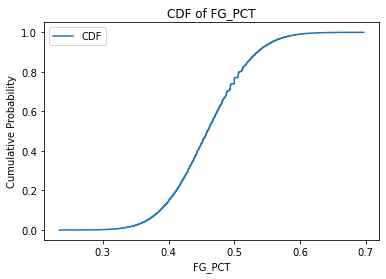

In [10]:
from statsmodels.distributions.empirical_distribution import ECDF

fg_pct_cdf = ECDF(combined_data_cleaned['FG_PCT'])

plt.step(fg_pct_cdf.x, fg_pct_cdf.y, label='CDF')
plt.xlabel('FG_PCT')
plt.ylabel('Cumulative Probability')
plt.title('CDF of FG_PCT')
plt.legend()
plt.show()

One of the useful things about CDFs is that it allows us to determine percentiles very easily. For example, here we see that the 50th percentile is between 45% and 50% field goal percentage. The reason I picked FG_PCT was becuase this CDF distribution pattern is synonymous with a normal distribution of data. If we take a look back up above at the histogram for FG_PCT, we see just that.  Also, because the curve is steeper between 40% and around 50%, this tells us that the majority of teams fall within this performance range of field goal percentage.

### Fitting a curve to the distribution
For this I will be using the curve_fit and norm methods from scipy library

The plot below shows a histogram of FG_PCT with a fitted, normal-distribution curve.

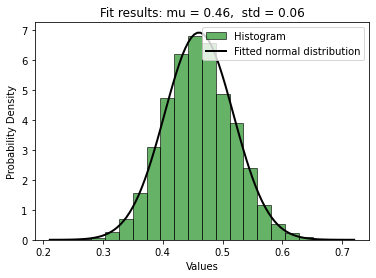

In [11]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

# histogram for FG_PCT
plt.hist(combined_data_cleaned['FG_PCT'], bins=20, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')

# Fit a normal distribution
mu, std = norm.fit(combined_data_cleaned['FG_PCT'])

# Create a range of values for the plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the fitted normal distribution
plt.plot(x, p, 'k', linewidth=2, label='Fitted normal distribution')

plt.legend()
plt.title('Fit results: mu = %.2f,  std = %.2f' % (mu, std))
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.show()


We can see that the fitted normal distribution overlays quite nicely with the generic histogram. This tells us that the data distribution is that of a normal distribution for FG_PCT

### Analyzing Correlation Between Variables
For this, I will be creating simple scatter plots comparing two pairs of variables. I will then calculate covariance and Pearson’s correlation. I will also consider non-linear relationships.

This first plot is FG_PCT and PTS. The reason why I chose these variables is becuase I intuitively assumed that there would be a relatively strong linear relationship. I assumed that if a team makes more shots than misses, then the total score would naturally increase. Consider the following plot.

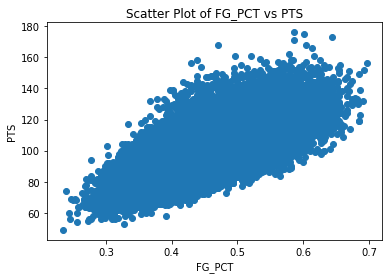

Pearson Correlation Coefficient: 0.6765565688940361
Covariance: 0.5262103903431727


In [12]:
from scipy.stats import pearsonr

plt.scatter(combined_data_cleaned['FG_PCT'], combined_data_cleaned['PTS'])
plt.title('Scatter Plot of FG_PCT vs PTS')
plt.xlabel('FG_PCT')
plt.ylabel('PTS')
plt.show()

correlation_coefficient, _ = pearsonr(combined_data_cleaned['FG_PCT'], combined_data_cleaned['PTS'])

covariance_fgpct_pts = combined_data_cleaned['FG_PCT'].cov(combined_data_cleaned['PTS'])

print("Pearson Correlation Coefficient: {}".format(correlation_coefficient))
print("Covariance: {}".format(covariance_fgpct_pts))


We see an upward trend in the plot, and Pearson's correlation coefficient provides evidence to that with a value of almost 0.67. We also see a positive covariance value, which indicates a positive relationship. We must keep in mind, however, that covariance is sensitive to the scale of the variables. For that reason, we put more emphasis on the correlation coefficient.

The next plot is FG3A and FG3_PCT. The reason why I chose these variables is becuase after doing some additional exploration I found that the plot has a unique pattern. It doesn't seem like it follows a linear approach, so I investigated further. Instead of using Pearson's approach, I instead used Spearman rank correlation approach.

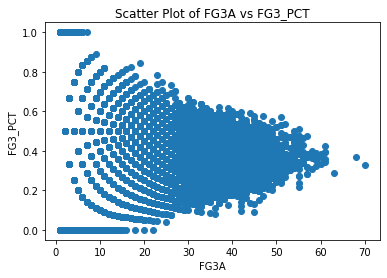

Spearman Rank Correlation Coefficient: 0.1508286882098923


In [13]:
plt.scatter(combined_data_cleaned['FG3A'], combined_data_cleaned['FG3_PCT'])
plt.title('Scatter Plot of FG3A vs FG3_PCT')
plt.xlabel('FG3A')
plt.ylabel('FG3_PCT')
plt.show()

spearman_corr = combined_data_cleaned[['FG3A', 'FG3_PCT']].corr(method='spearman').iloc[0, 1]

print("Spearman Rank Correlation Coefficient: {}".format(spearman_corr))

Although the coefficient is close to zero, I'm still skeptical and think that there is an underlying correlation. I am not sure, however, as to which approach can best quantifies relationships such as this: where the y-values tend to converge as x-values increase.

### Performing Hypothesis Test - Testing Correlation
Previously, I had calculated Pearson Correlation Coefficient after plotting FG_PCT vs PTS. The coefficient came to be around 0.68. I would know like to test whether this correlation is statistically significant.

In [14]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

import thinkstats2
import thinkplot

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [15]:
data = combined_data_cleaned.FG_PCT.values, combined_data_cleaned.PTS.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The reported p-value is 0, which means that in 1000 trials we don't see a correlation, under the null hypothesis, that exceeds the observed correlation. Although it's probably not actually 0, just smaller than 0.001 (1/1000)

### Conduct a Regression Analysis
For this, I will derive a binary regression model, with the target variable WL, and the explanatory variables being the required variables: ['PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT']

First I use the add_constant method to add our required variables as the explanatory variables. Then I use the Logit method to create a model that predicts WL. I then fit the model with a maximum iteration count of 1000 just in case, the provide the summary of the results.

In [16]:
import statsmodels.api as sm

X = sm.add_constant(combined_data_cleaned[['PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT']])
logit_model = sm.Logit(combined_data_cleaned['WL'], X)
result = logit_model.fit(maxiter=1000)

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.552287
         Iterations 28
                           Logit Regression Results                           
Dep. Variable:                     WL   No. Observations:                87160
Model:                          Logit   Df Residuals:                    87149
Method:                           MLE   Df Model:                           10
Date:                Fri, 17 Nov 2023   Pseudo R-squ.:                  0.2032
Time:                        14:24:25   Log-Likelihood:                -48137.
converged:                       True   LL-Null:                       -60414.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3231      0.775     -8.159      0.000      -7.842      -4.804
PTS            0.0728   2899

After successfully creating our logistic regression model, we can use the same explantory variables to predict outcomes of WL and compare those predictions against actual WL.

In [17]:
predictions = result.predict(X)
binary_predictions = (predictions >= 0.5).astype(int)

accuracy = (binary_predictions == combined_data_cleaned['WL']).mean()
accuracy

0.7153396053235429

We see that our model that considers all of the required variables is just over 70% accurate. Pretty good!